## Airbus Ship Detection Project

Dataset:

- Load CSV files
    - Label Dataset: find how many unique images with and without ships
    - Count Ships: count how many ships in images
- Show sample images
    - show area given by EncodedPixels in a bounding box

Things considered:

- check if there are duplicates of 'ImageId'
- do not use 'ImageId' as index, it is not unique
- image may have several copies and each one may have a partial set of ship pixels
- an image copy may show one or more ships
- check if there are duplicates of 'EncodedPixels', whether the whole string or a tuple

## Data Analysis and Visualization

### Load CSV Files

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import csv
import cv2

%matplotlib inline

In [2]:
basedir = './test_images/'

### TEST IMAGES

In [3]:
tests_df = pd.read_csv("./test_ship_segmentations.csv")
tests_df.head()

ImageId                                      EncodedPixels
0  0001124c7.jpg                                                NaN
1  000194a2d.jpg  51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...
2  000194a2d.jpg  360486 1 361252 4 362019 5 362785 8 363552 10 ...
3  000194a2d.jpg  254389 9 255157 17 255925 17 256693 17 257461 ...
4  000194a2d.jpg  198320 10 199088 10 199856 10 200624 10 201392...

### TEST IMAGES WITH LABELS

In [4]:
tests_df["GotShip"] = 0
tests_df.loc[tests_df["EncodedPixels"].notnull(), "GotShip"] = 1
# tests_df['GotShips'] = np.where(tests_df['EncodedPixels'].isnull(), 0, 1)
tests_df.head()

ImageId                                      EncodedPixels  GotShip
0  0001124c7.jpg                                                NaN        0
1  000194a2d.jpg  51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...        1
2  000194a2d.jpg  360486 1 361252 4 362019 5 362785 8 363552 10 ...        1
3  000194a2d.jpg  254389 9 255157 17 255925 17 256693 17 257461 ...        1
4  000194a2d.jpg  198320 10 199088 10 199856 10 200624 10 201392...        1

### TEST IMAGES WITHOUT SHIPS

In [5]:
print('Number of images without ships in test log: ', tests_df.ImageId[tests_df['GotShip'] == 0].nunique())

# tests_df.to_csv("./dataset/tests/ships.csv")

Number of images without ships in test log:  75000


In [6]:
noship = tests_df[tests_df['GotShip'] == 0]
noship.head()

ImageId EncodedPixels  GotShip
0   0001124c7.jpg           NaN        0
6   0001b1832.jpg           NaN        0
7   00052ed46.jpg           NaN        0
10  000592296.jpg           NaN        0
12  000805313.jpg           NaN        0

### SAMPLE IMAGES WITHOUT SHIPS

In [7]:
def show_samples(imagedata, no_of_images, no_of_rows=4, no_of_cols=4):
    i = 0
    ship_sx = random.sample(range(0, len(imagedata)), no_of_images)
    samples = imagedata.iloc[ship_sx]
    fig = plt.figure(1, figsize = (20,20))
    for index, row in samples.iterrows():
        i = i + 1
        image = mpimg.imread(basedir + row['ImageId'])
        img = image.copy()
        rszImg = cv2.resize(img, (200, 200), cv2.INTER_AREA)

        ax = fig.add_subplot(no_of_rows, no_of_cols, i)
        ax.set_title(index)
        ax.imshow(rszImg)
        fig.tight_layout()  
    

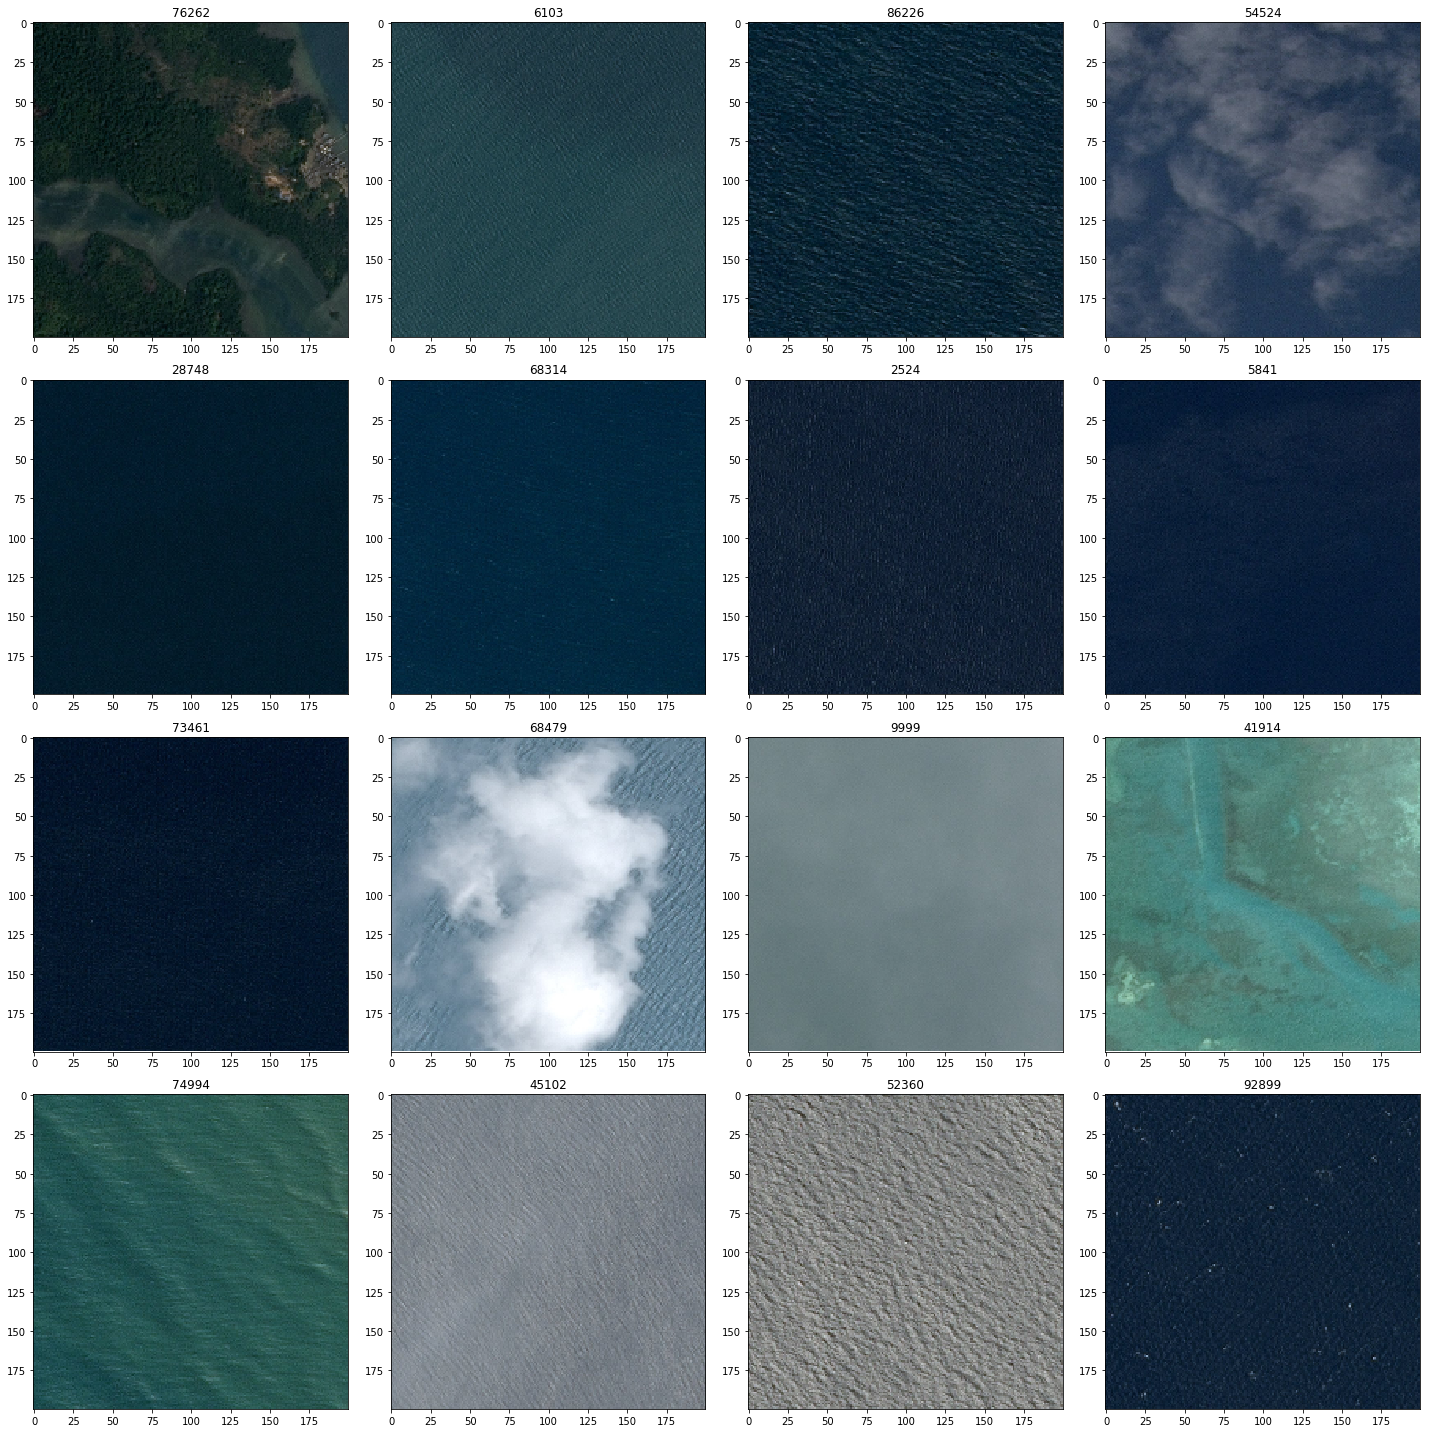

In [8]:
show_samples(noship, 16)

### TEST IMAGES WITH SHIPS 

In [9]:
print('Number of images with ships in test log: ', tests_df.ImageId[tests_df['GotShip'] != 0].size)
print('Number of unique images with ships in test log: ', tests_df.ImageId[tests_df['GotShip'] != 0].nunique())

# tests_df.to_csv("./dataset/tests/ships.csv")

Number of images with ships in test log:  25693
Number of unique images with ships in test log:  13486


In [10]:
ship = tests_df[tests_df['GotShip'] != 0]
ship.head(10)

ImageId                                      EncodedPixels  GotShip
1   000194a2d.jpg  51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...        1
2   000194a2d.jpg  360486 1 361252 4 362019 5 362785 8 363552 10 ...        1
3   000194a2d.jpg  254389 9 255157 17 255925 17 256693 17 257461 ...        1
4   000194a2d.jpg  198320 10 199088 10 199856 10 200624 10 201392...        1
5   000194a2d.jpg  55683 1 56451 1 57219 1 57987 1 58755 1 59523 ...        1
8   000532683.jpg  458957 14 459725 14 460493 14 461261 14 462029...        1
9   000532683.jpg  567543 2 568309 4 569077 5 569846 4 570614 5 5...        1
11  0005d6d95.jpg  265143 1 265910 4 266678 5 267445 7 268212 10 ...        1
22  001234638.jpg  131064 1 131831 3 132599 5 133366 7 134133 9 1...        1
32  0017c19d6.jpg  405963 1 406730 3 407497 5 408264 7 409031 10 ...        1

### SAMPLE IMAGES WITH SHIPS

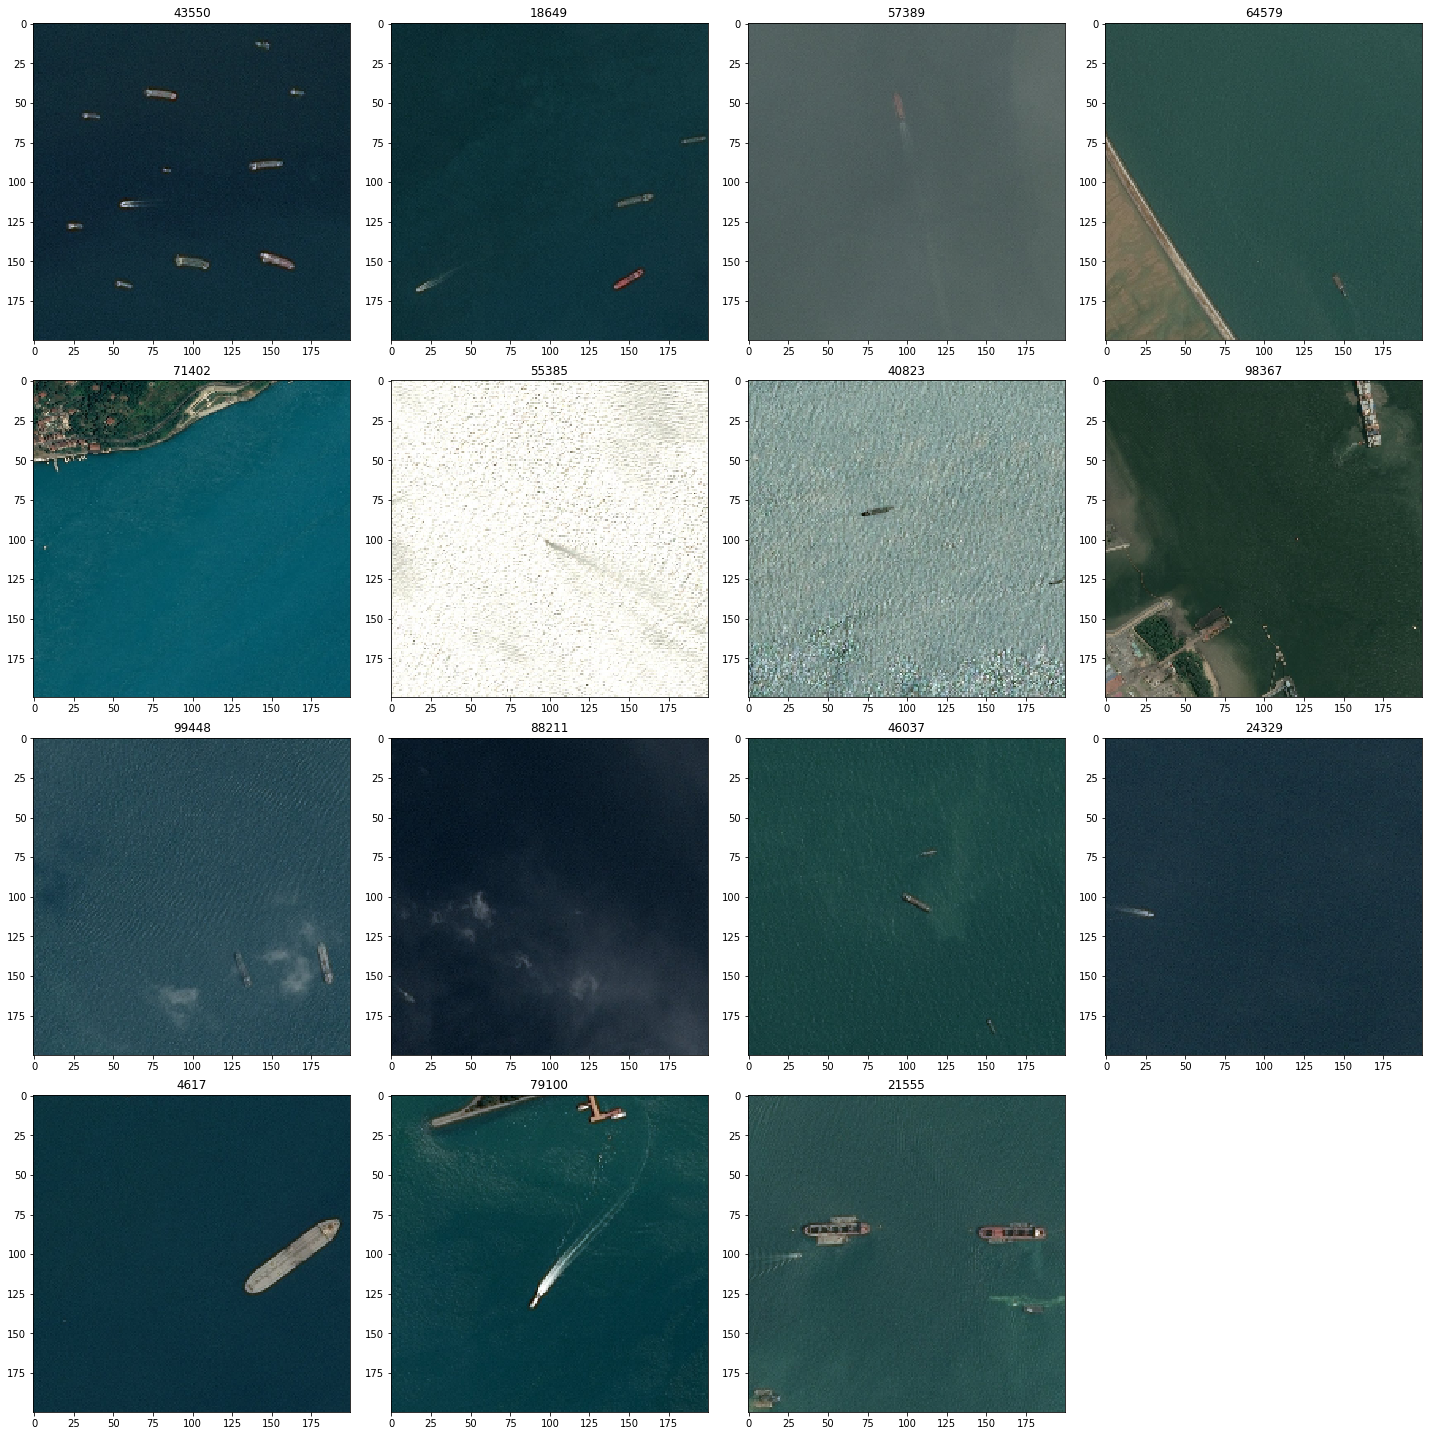

In [12]:
show_samples(ship, 15)

##### Several images with ships have similar ImageId but different EncodedPixels. An example is given below.

In [13]:
x = tests_df[tests_df["ImageId"] == "000194a2d.jpg"]
x

ImageId                                      EncodedPixels  GotShip
1  000194a2d.jpg  51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...        1
2  000194a2d.jpg  360486 1 361252 4 362019 5 362785 8 363552 10 ...        1
3  000194a2d.jpg  254389 9 255157 17 255925 17 256693 17 257461 ...        1
4  000194a2d.jpg  198320 10 199088 10 199856 10 200624 10 201392...        1
5  000194a2d.jpg  55683 1 56451 1 57219 1 57987 1 58755 1 59523 ...        1

### SAMPLE IMAGES WITH SHIPS, SIMILAR IMAGEID

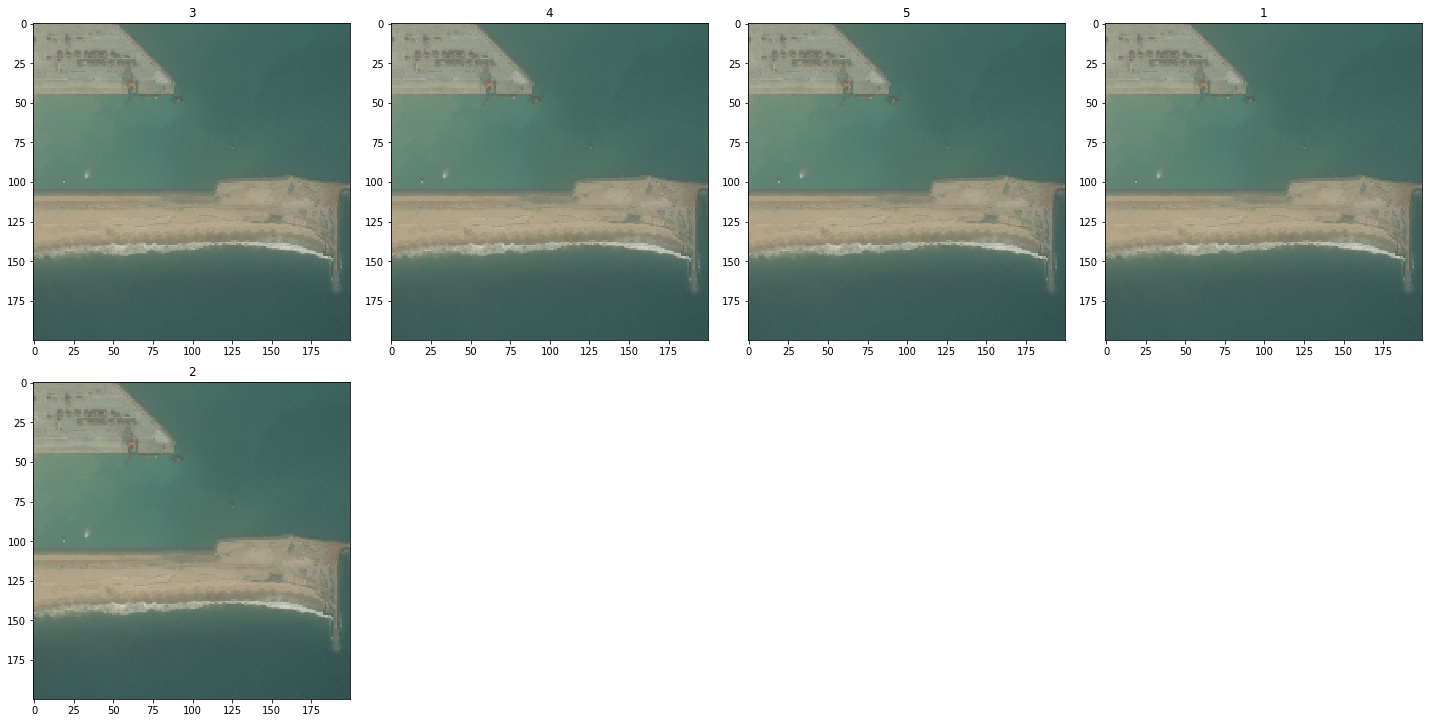

In [14]:
show_samples(x, 5)

In [15]:
# CHECK THAT NO DUPLICATE ENCODEDPIXELS ARE LISTED
duped_ship = ship.drop_duplicates("EncodedPixels")
print (len(duped_ship))

25693


## Count Ships

### IMAGES WITH/WITHOUT SHIPS DISTRIBUTION

In [16]:
df1 = pd.DataFrame({'':['Ship', 'No Ship'], 'Image Count':[len(ship), len(noship)]})
df1

Image Count
0     Ship        25693
1  No Ship        75000

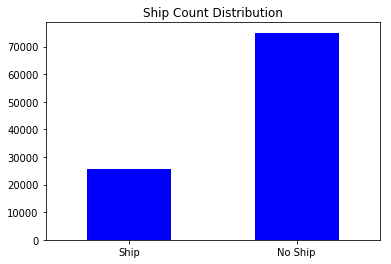

In [17]:
df1.plot.bar(x='', y='Image Count', rot=0, color='b', legend=None, title="Ship Count Distribution")

### IMAGES WITH DUPLICATES

In [18]:
# COUNT THE NUMBER OF DUPLICATES EACH IMAGE HAS
unique_ship = ship['ImageId'].value_counts().reset_index()
unique_ship.columns = ['ImageId', 'NumberOfDuplicates']
unique_ship.head()

ImageId  NumberOfDuplicates
0  74150366c.jpg                  15
1  ff7ac7f3c.jpg                  15
2  16ccec57a.jpg                  15
3  c8e722430.jpg                  15
4  6c4e3bea5.jpg                  15

In [20]:
# COUNT THE NUMBER OF IMAGES vs NUMBER OF DUPLICATES 
dupeship = unique_ship.groupby('NumberOfDuplicates').count()
dupeship

ImageId
NumberOfDuplicates         
1                      8579
2                      2442
3                       922
4                       543
5                       316
6                       204
7                       133
8                        95
9                        70
10                       47
11                       45
12                       31
13                       16
14                       23
15                       20

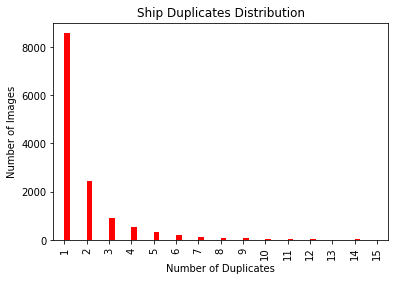

In [21]:
plt.figure()
df2 = pd.DataFrame(dupeship, columns=['NumberOfDuplicates', 'ImageId'])
ax = df2.plot.bar(color='r', legend=None, title="Ship Duplicates Distribution")
ax.set_xlabel("Number of Duplicates")
ax.set_ylabel("Number of Images")

### NUMBER OF SHIPS PER IMAGE DISTRIBUTION

In [22]:
# SAMPLE
idx = random.sample(range(0, len(ship)), 1)
sx_one = ship.iloc[idx]
encodedpixels = sx_one['EncodedPixels'].values
sx_image = sx_one['ImageId'].values

In [23]:
sx = sx_image[0]
sx_base = basedir + sx
sx_base

'./test_images/83e576834.jpg'

In [24]:
sample_data = ship[ship['ImageId'] == sx]
sample_data

ImageId                                      EncodedPixels  \
51768  83e576834.jpg  315137 9 315905 25 316673 41 317441 57 318209 ...   
51769  83e576834.jpg  334384 9 335152 18 335920 18 336688 17 337455 ...   

       GotShip  
51768        1  
51769        1

In [25]:
unique_ship.NumberOfDuplicates[unique_ship['ImageId'] == sx_image[0]]

4690    2
Name: NumberOfDuplicates, dtype: int64

##### THE MASK

In [26]:
# CREATE AN IMAGE MASK
mask = np.zeros((768, 768))

# UNRAVEL MASK INTO ARRAY
mask = mask.ravel()
mask

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

##### THE ENCODED PIXELS

In [27]:
# CREATE SHIP MASK
def encode_rle(encodedpixels, n=2):
    # SPLIT ENCODED PIXELS STRING
    shipmask = encodedpixels.split()
    # CONVERT LIST TO TUPLES
    shipmask = zip(*[iter(shipmask)]*n)
    # CONVERT STRING TO INT
    rle = [(int(start), int(start) + int(length)) for start, length in shipmask]
    return rle

In [28]:
rle_data = sample_data['EncodedPixels'].apply(encode_rle)
rle_data

51768    [(315137, 315146), (315905, 315930), (316673, ...
51769    [(334384, 334393), (335152, 335170), (335920, ...
Name: EncodedPixels, dtype: object

##### IMAGE MASK AND ENCODEDPIXELS COMBINED

In [29]:
def total_mask(rle_data, mask):
    for rle in rle_data:
        for start,end in rle:
            print (start, end)
            mask[start:end] = 1
    mask = mask.reshape(768,768).T
    return mask

In [30]:
mask = total_mask(rle_data, mask)

315137 315146
315905 315930
316673 316714
317441 317498
318209 318275
318977 319043
319745 319811
320513 320579
321281 321347
322049 322115
322817 322883
323584 323651
324352 324419
325120 325187
325888 325955
326656 326722
327424 327490
328192 328258
328960 329026
329728 329794
330496 330562
331264 331330
332041 332081
332084 332098
332825 332849
332856 332866
333609 333617
333628 333634
334400 334402
334384 334393
335152 335170
335920 335938
336688 336705
337455 337473
338223 338241
338994 339009
339768 339776
340541 340544


In [31]:
# fig = plt.figure()
# ax = fig.add_subplot(1, 1, 1)
# ax.imshow(mask)

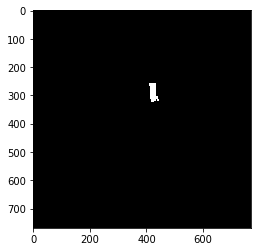

In [32]:
img_mask = np.dstack((mask, mask, mask))
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.imshow(img_mask)

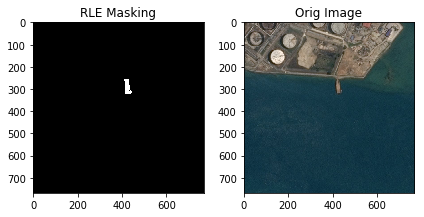

In [33]:
# SHOW MASK IMAGE
fig = plt.figure()

# rszImg = cv2.resize(mask, (200, 200), cv2.INTER_AREA)
ax = fig.add_subplot(1, 2, 1)
ax.set_title("RLE Masking")
ax.imshow(img_mask)

orig_image = mpimg.imread(sx_base)
ax = fig.add_subplot(1, 2, 2)
ax.set_title("Orig Image")
ax.imshow(orig_image)
fig.tight_layout()

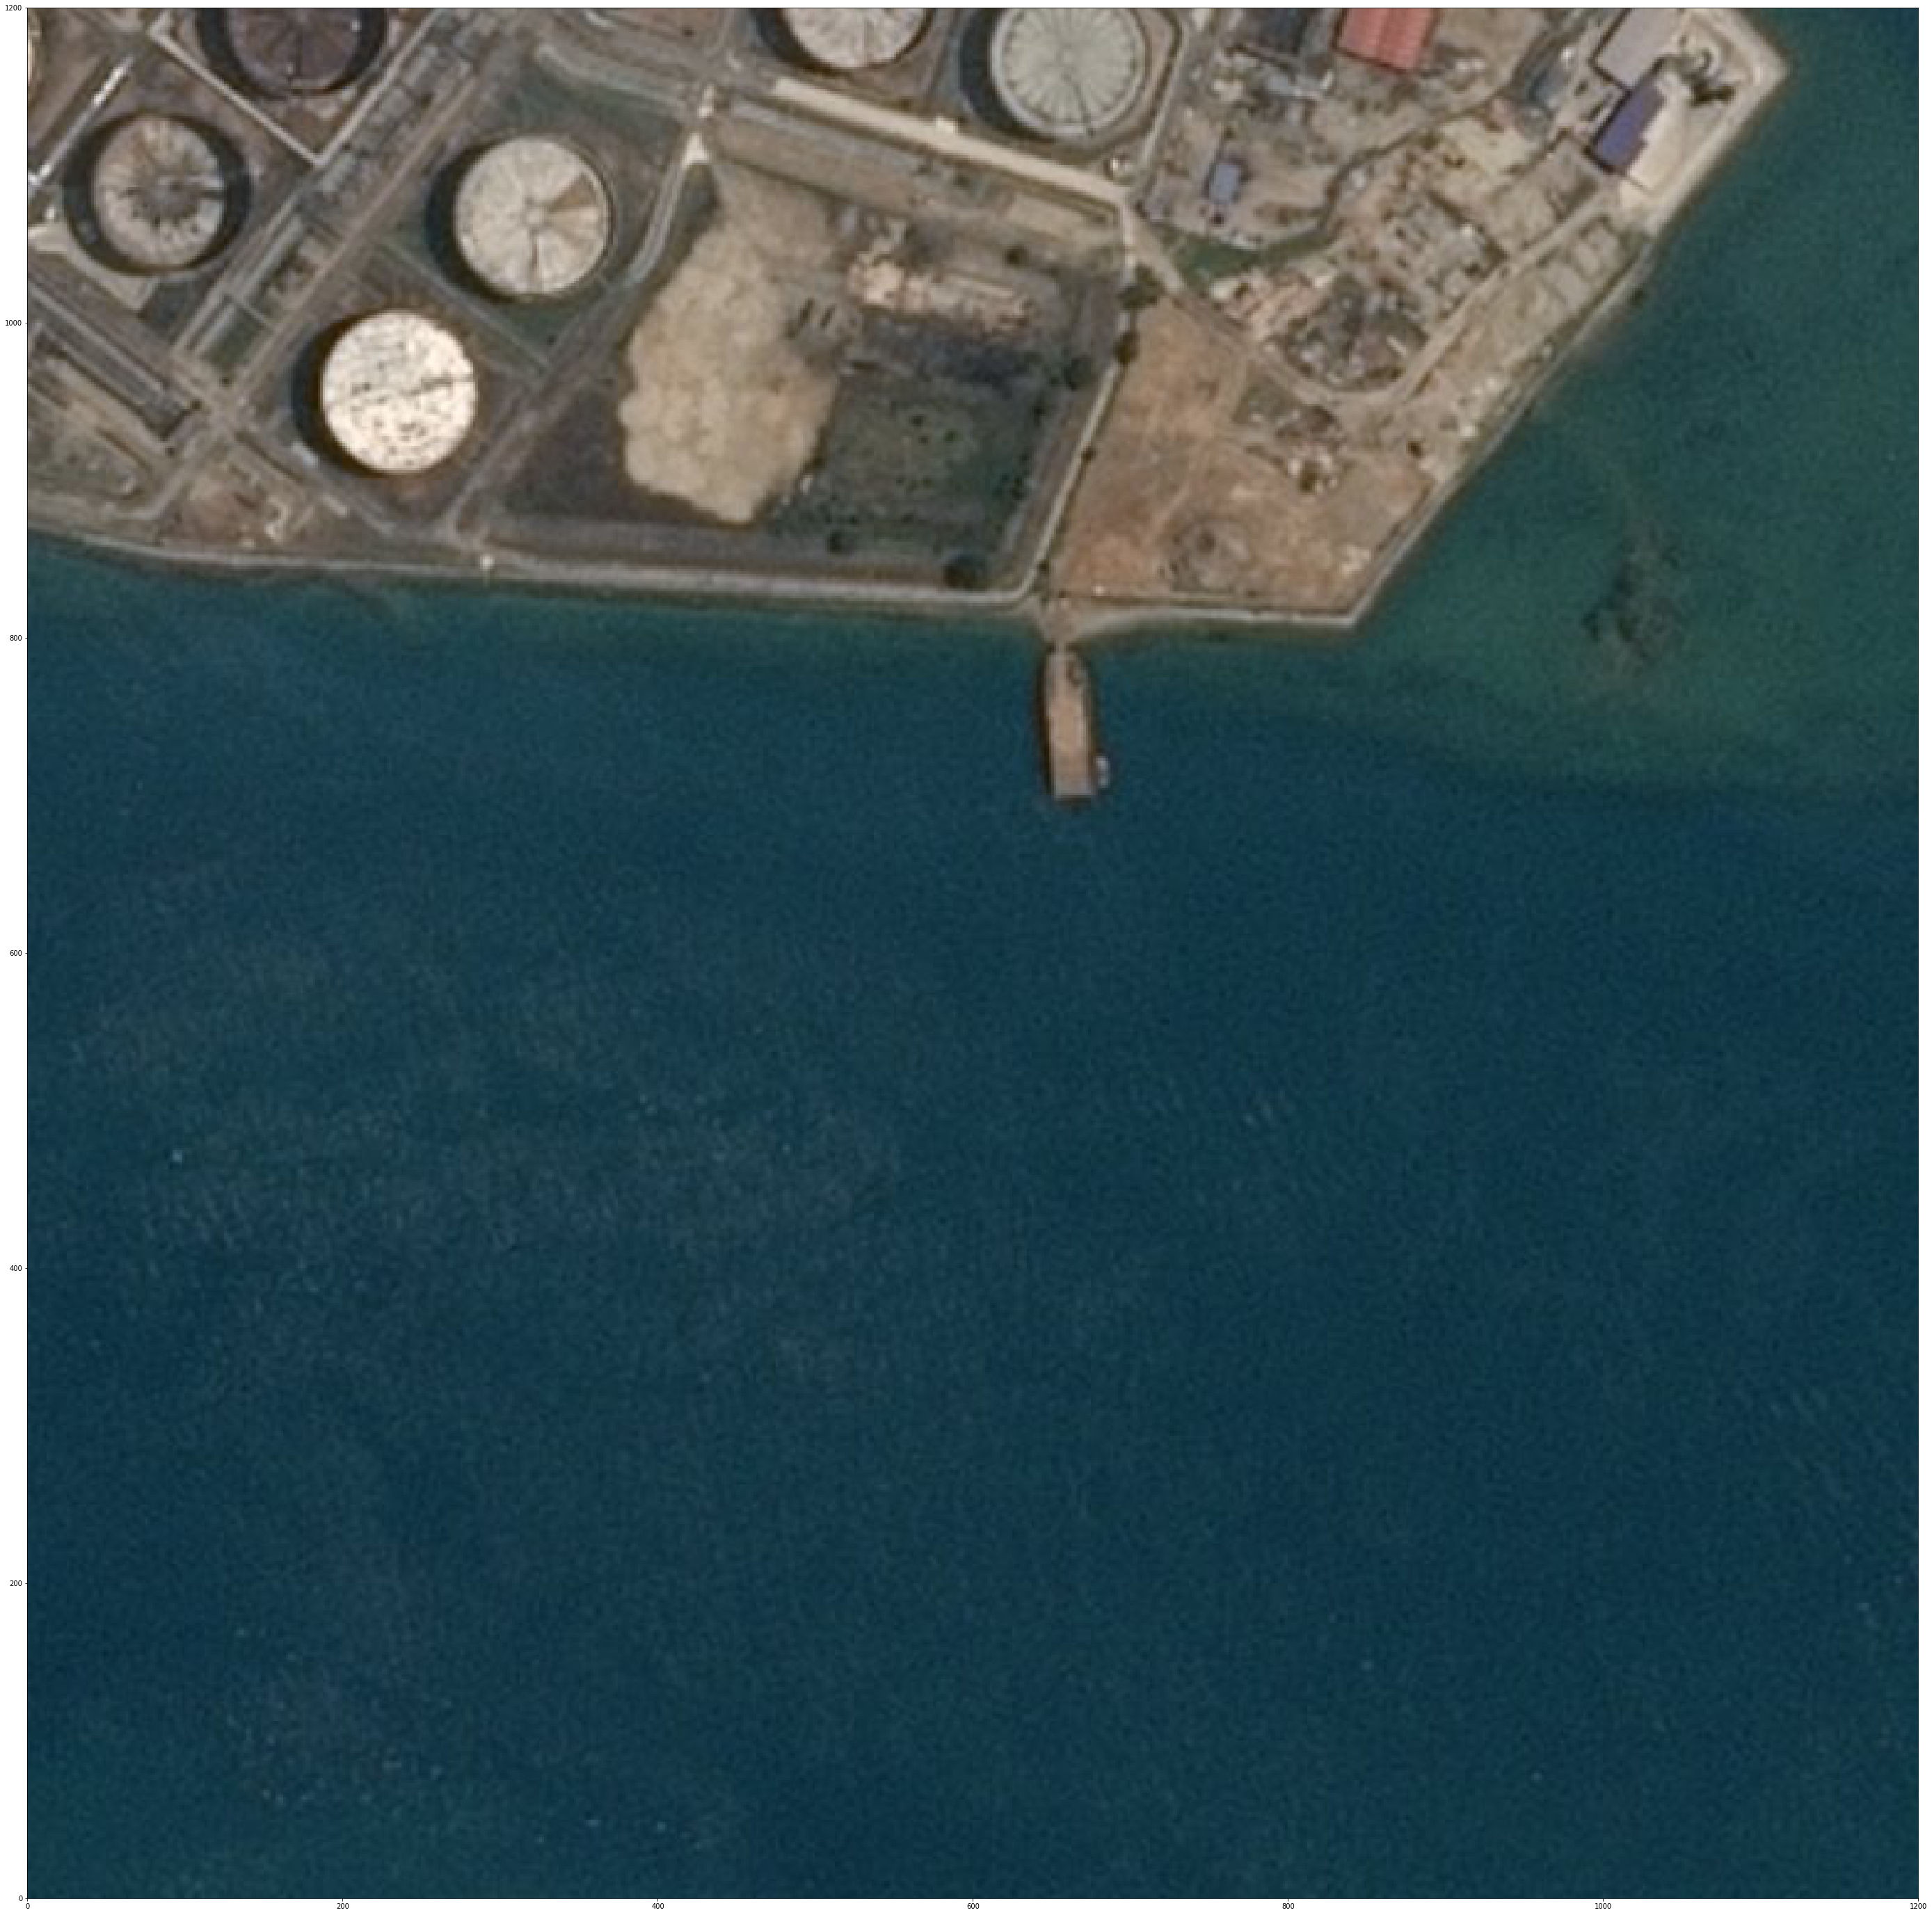

In [34]:
x = range(1200)
fig, ax = plt.subplots(1, figsize = (50,50))
ax.imshow(orig_image, extent=[0, 1200, 0, 1200])

In [35]:
poly = np.ascontiguousarray(mask, dtype=np.uint8)
(flags, contours, h) = cv2.findContours(poly, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [36]:
contour_image = orig_image.copy()
cv2.drawContours(contour_image, contours, -1, (0,255,0), 1)

array([[[131, 118, 102],
        [122, 110,  94],
        [107,  95,  79],
        ..., 
        [ 29,  61,  72],
        [ 28,  60,  73],
        [ 27,  59,  72]],

       [[131, 118, 102],
        [124, 112,  96],
        [109,  97,  81],
        ..., 
        [ 29,  61,  72],
        [ 29,  61,  74],
        [ 29,  61,  74]],

       [[126, 113,  97],
        [126, 114,  98],
        [117, 105,  89],
        ..., 
        [ 28,  60,  71],
        [ 28,  60,  71],
        [ 30,  62,  73]],

       ..., 
       [[ 18,  58,  70],
        [ 16,  56,  68],
        [ 15,  55,  67],
        ..., 
        [ 20,  59,  74],
        [ 20,  59,  74],
        [ 20,  59,  74]],

       [[ 19,  59,  71],
        [ 15,  55,  67],
        [ 12,  52,  64],
        ..., 
        [ 20,  59,  74],
        [ 20,  59,  74],
        [ 20,  59,  74]],

       [[ 21,  61,  73],
        [ 15,  55,  67],
        [ 10,  50,  62],
        ..., 
        [ 18,  57,  72],
        [ 18,  57,  72],
        [ 17,  56,

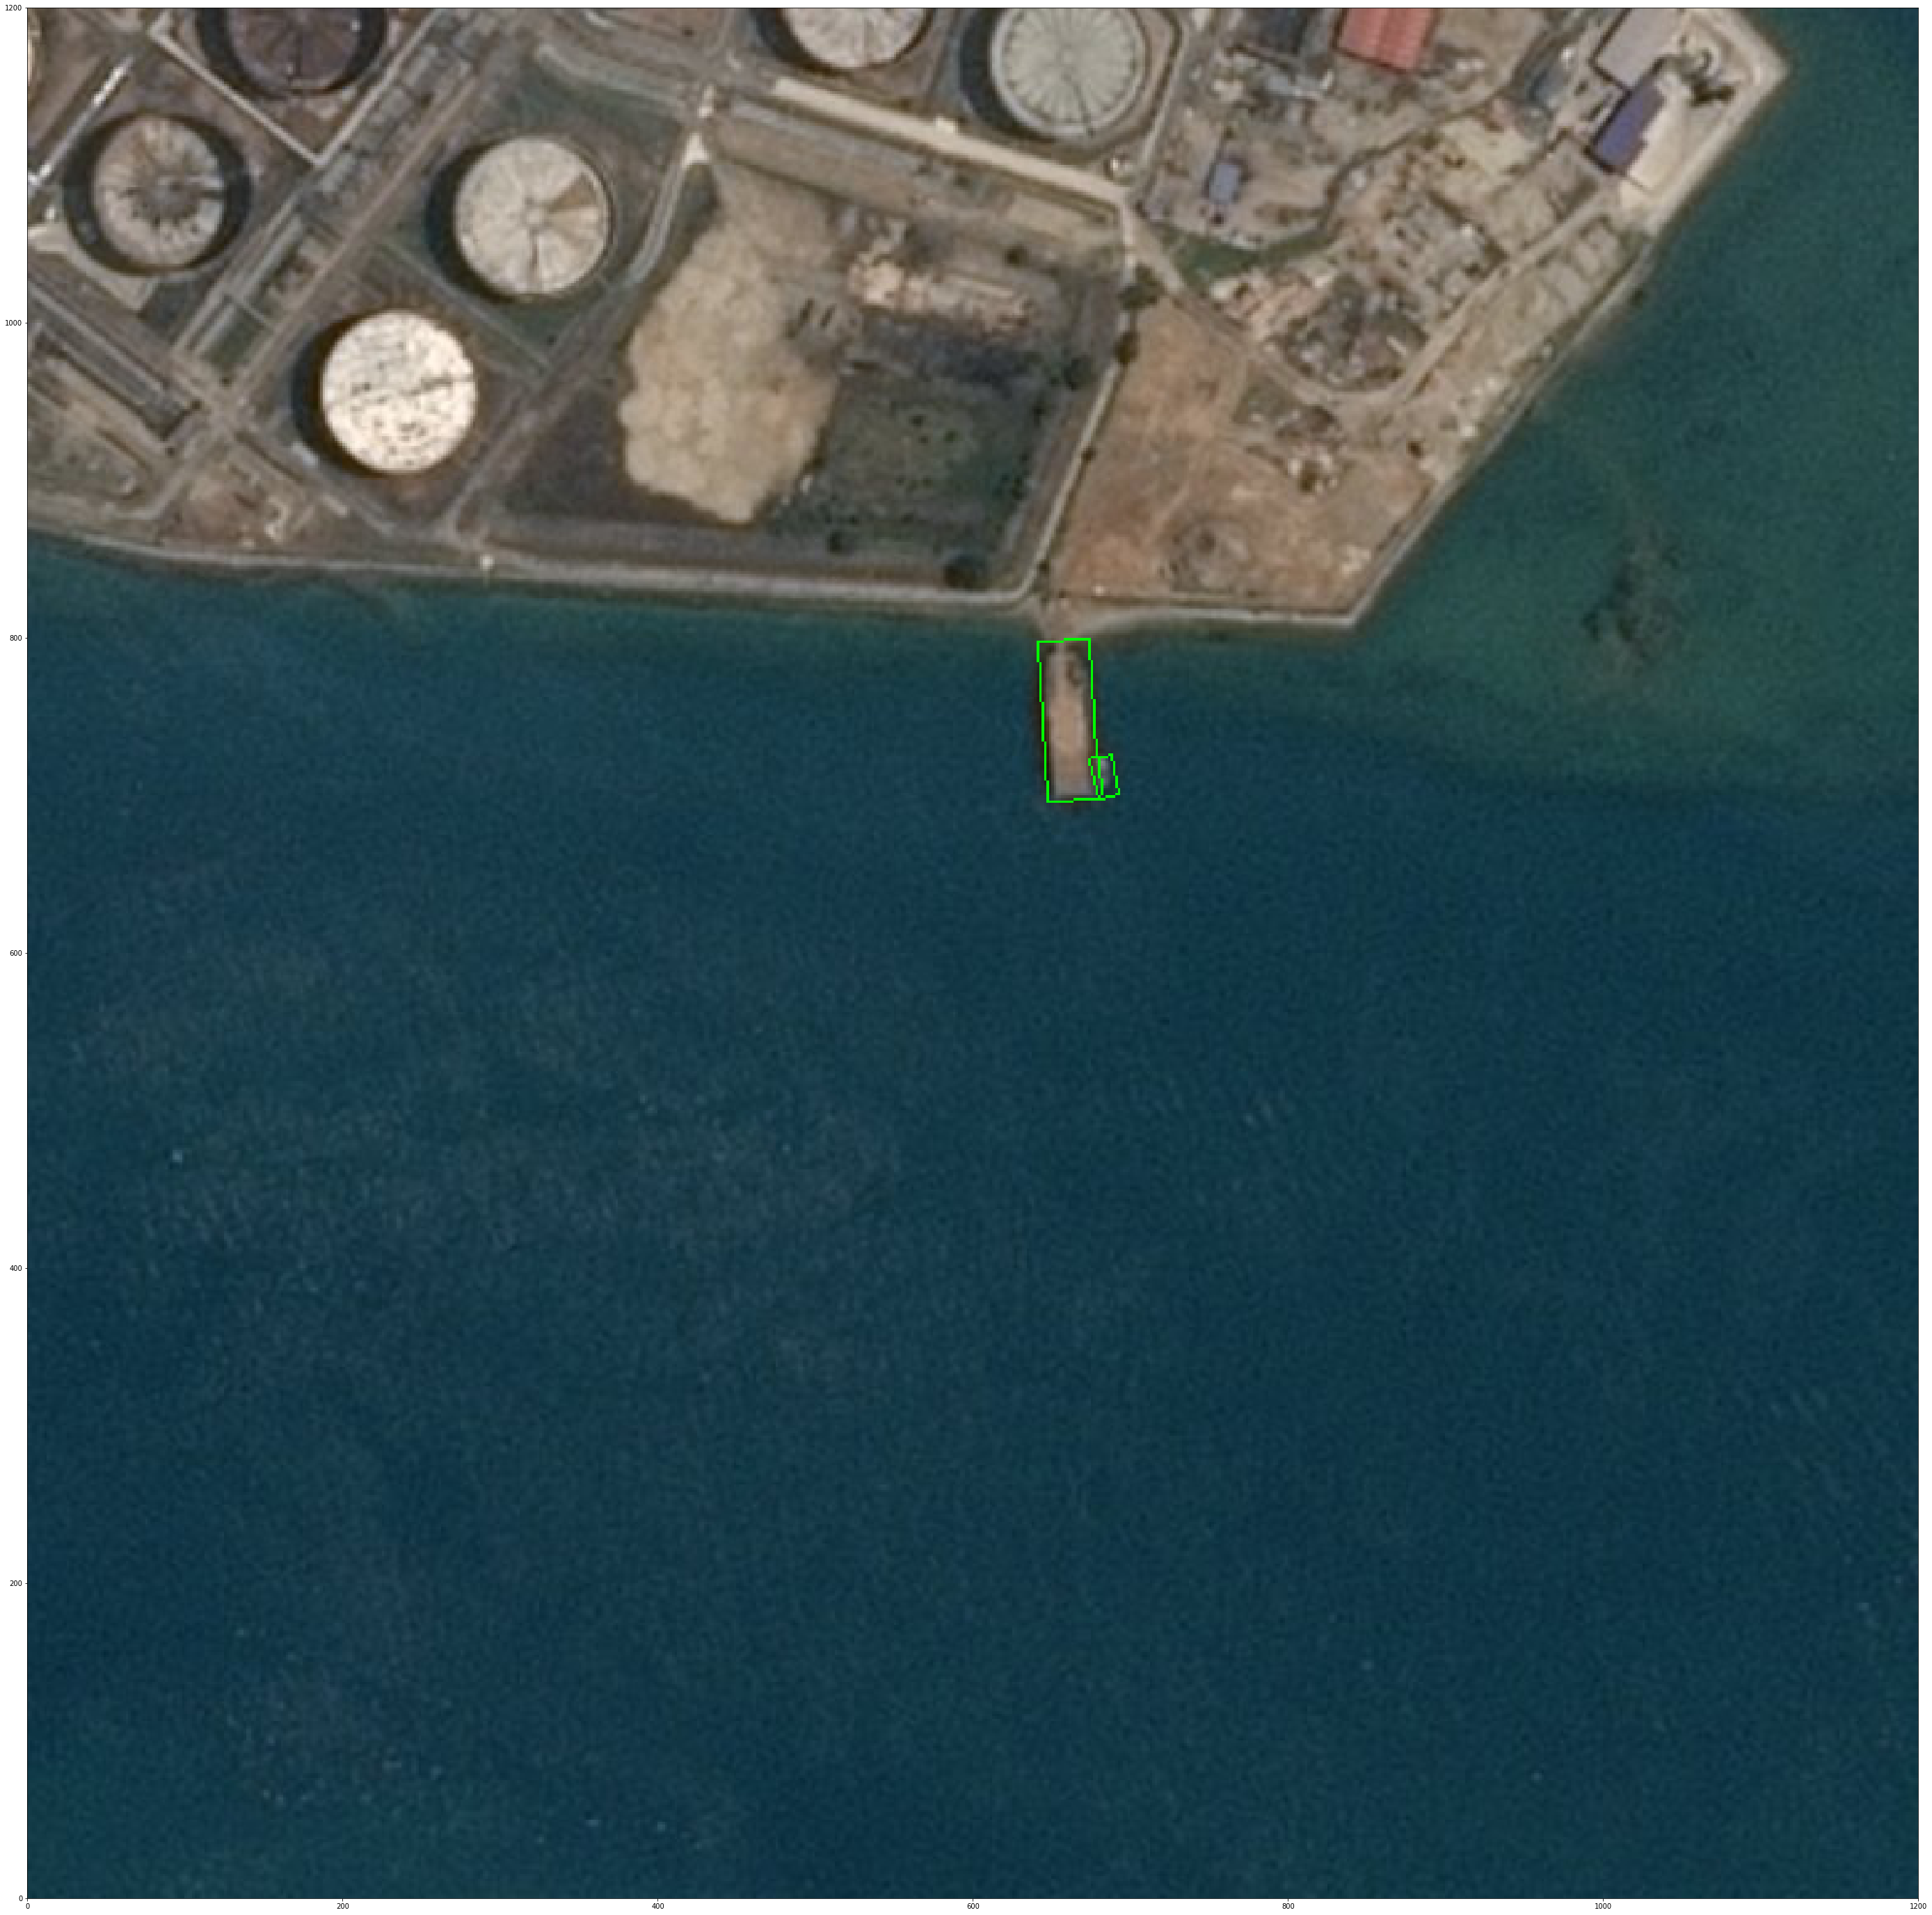

In [37]:
x = range(1200)
fig, ax = plt.subplots(1, figsize = (50,50))
ax.imshow(contour_image, extent=[0, 1200, 0, 1200])

TODO:
- start feature extraction (shape, color, contrast, edge, most likely position, size)